## Treść

Napisz program, który będzie ilustrował Centralne Twierdzenie Graniczne poprzez symulację rozkładu sumy $n$ zmiennych losowych, z których każda przyjmuje wartość 0, 1, 2, 3 lub 4. Program na wejściu dostaje $n$ oraz rozkład zmiennych $X_i$ , $i = 1, ..., n$ , tzn. wartości $p(0), ..., p(4)$ , a na wyjściu rysuje wykres rozkładu prawdopodobieństwa zmiennej $Y = \sum^{n}_{i=1} X_i$ (np. poprzez symulację 1000 generacji zmiennej Y).

Wykonaj eksperymenty dla $n = 5, 10, 25, 100$ i dla dowolnego rozkładu (np. $p(0) = 0.25, p(1) = 0.15, p(2) = 0.1, p(3) = 0.2, p(4) = 0.3$). Zaobserwuj, jak rozkład zbliża się do normalnego wraz ze wzrostem $n$.

In [1]:
# IMPORTS

import random as r
import math as m
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import collections as c

from typing import *
from functools import partial

In [2]:
# MISC

unif = r.random
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

In [3]:
# CONSTANTS

DISTRIBUTION = [0.25, 0.15, 0.1, 0.2, 0.3]
N = [5, 10, 25, 100, 500, 1_000]
REPEATS = 1_000

In [4]:
def randomX(cum: List[Tuple[int,float]]):
    x = unif()

    for v, p in cum:
        if x < p:
            return v

In [5]:
def normal_distribution(x: float, ex: float, varx: float):
    return m.exp(-((x - ex)/varx)**2 / 2) / (m.sqrt(2 * m.pi) * varx)

In [6]:
def ctg(n: int, dist: List[float]):    
    cum = [(i, sum(dist[:i+1])) for i, x in enumerate(dist)] # rozkład skumulowany
    
    data = c.Counter()
    
    for _ in range(REPEATS): # generacja 1000 razy
        sn = sum(map(lambda _: randomX(cum), range(n))) # rozkład n zmiennych
        data[sn] += 1
        
    data = [(x, data/REPEATS) for x,data in data.items()] # policzenie prawdopodobieństwa wystąpienia danego Y
    data.sort(key=lambda x: x[0])
    
    x, y = zip(*data)
    
    # Rozkład normalny dla porównania
    ex = sum(map(lambda t: t[0]*t[1], zip(x,y)))
    varx = sum(map(lambda t: ((t[0] - ex) ** 2) * t[1], zip(x,y)))
    stdx = m.sqrt(varx)
    normal = partial(normal_distribution, ex=ex, varx=stdx)
    
    y2 = [normal(t) for t in x]
    return x, y, y2

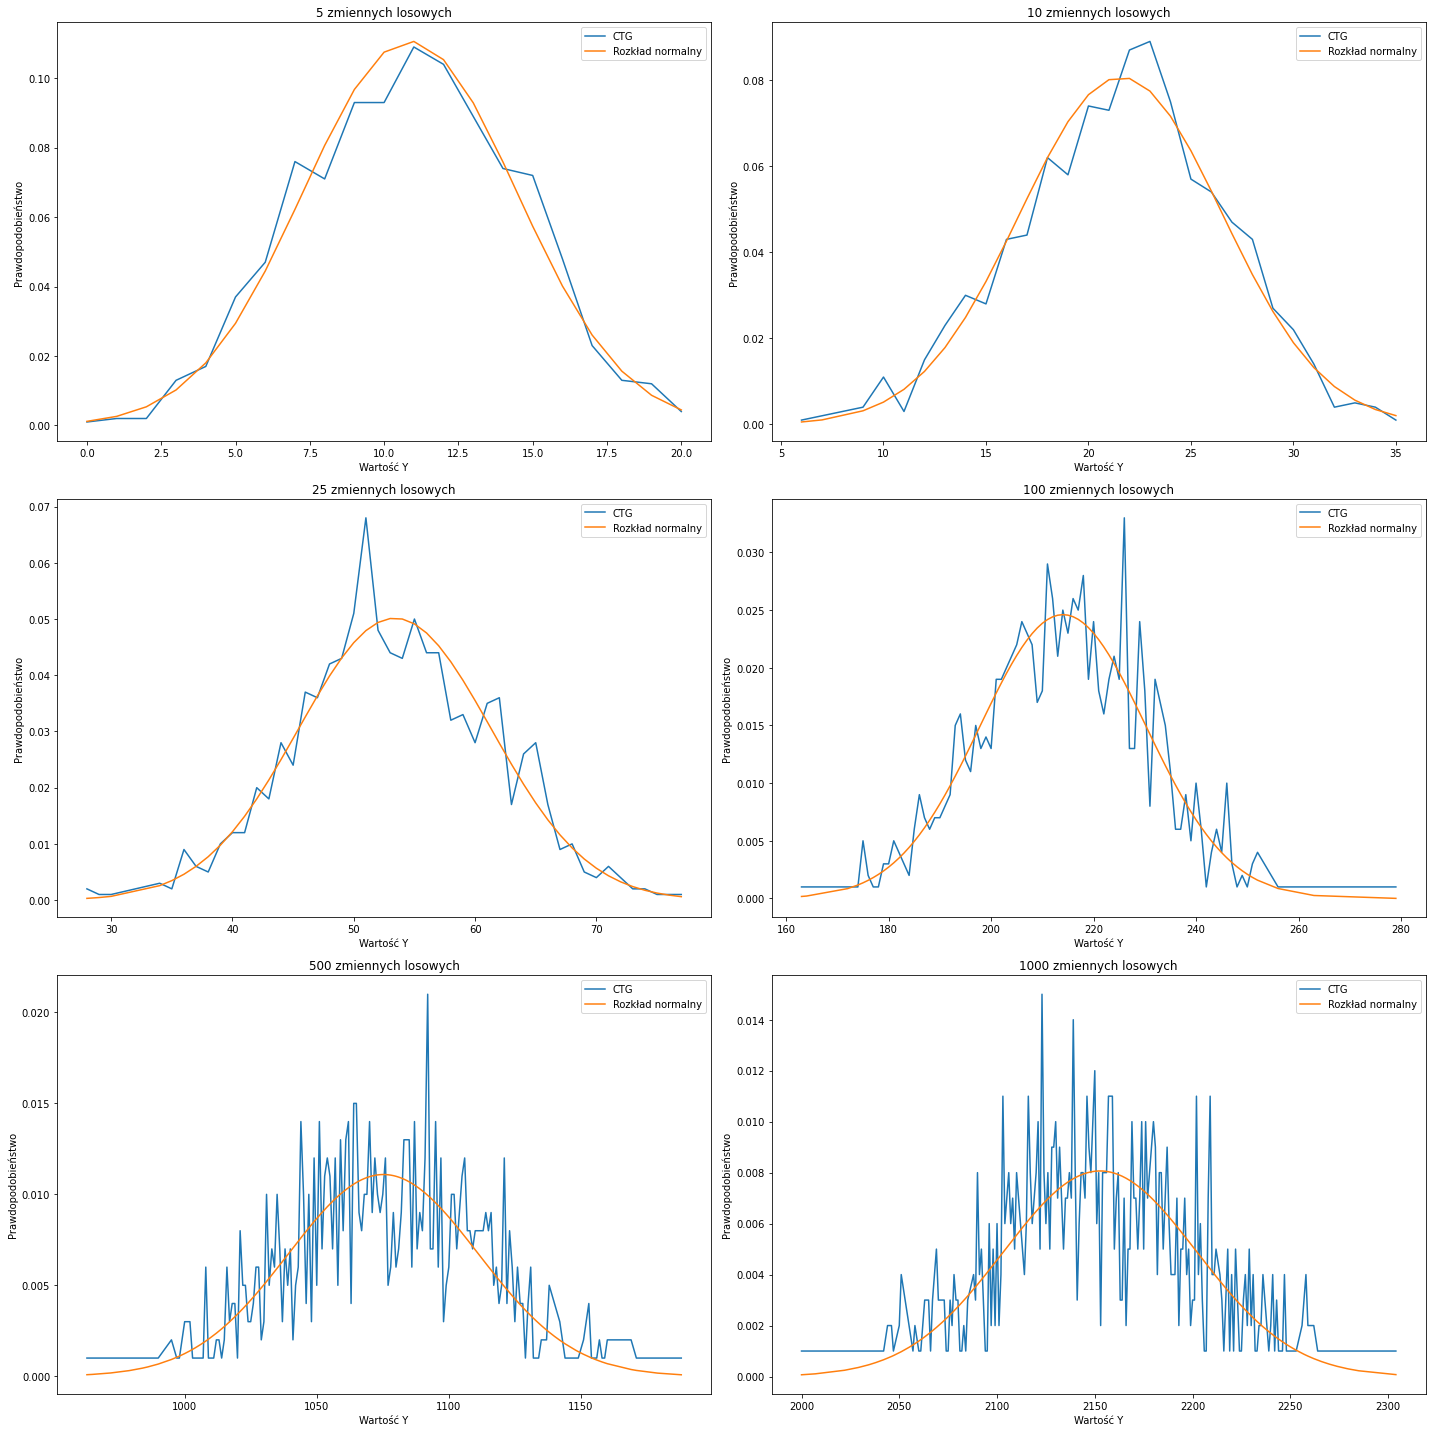

In [7]:
fig, axs = plt.subplots(3, 2)

i = 0
j = 0

for k, n in enumerate(N):
    x, y, y2 = ctg(n, DISTRIBUTION)
    axs[i, j].plot(x, y, label='CTG')
    axs[i, j].plot(x, y2, label='Rozkład normalny')
    axs[i, j].set_ylabel('Prawdopodobieństwo')
    axs[i, j].set_xlabel('Wartość Y')
    axs[i, j].set_title(f'{n} zmiennych losowych')
    axs[i, j].legend()
    j = (j + 1) % 2
    if j == 0:
        i += 1
        
fig.tight_layout()
plt.show()

### Autor

Marek Grzelak